In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('well_header0.csv')

In [63]:
df.head()

,EPAssetsId,CurrentStatus,WellType,Formation,Field,Pool,Surf_Location,Surf_Township,Surf_Meridian,Surf_Range,...,TotalDepth,LaheeClass,DrillingContractor,DaysDrilling,DrillMetresPerDay,TVD,WellProfile,PSACAreaCode,PSACAreaName,ProjectedDepth
0,2593278,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,04-26-066-24-W5,66,W5,24,...,3607.0,Development,Excalibur Drilling Ltd,13.0,277.46,1954.58,Horizontal,AB2,Foothills Front,3700.0
1,2579437,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,16-21-066-24-W5,66,W5,24,...,3502.0,Development,Excalibur Drilling Ltd,13.0,269.38,1940.06,Horizontal,AB2,Foothills Front,3800.0
2,2591761,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,16-21-066-24-W5,66,W5,24,...,3491.0,Development,Excalibur Drilling Ltd,12.0,290.92,1945.01,Horizontal,AB2,Foothills Front,3500.0
3,2587302,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,08-21-066-24-W5,66,W5,24,...,3578.0,Development,Excalibur Drilling Ltd,11.0,325.27,1956.34,Horizontal,AB2,Foothills Front,3800.0
4,2600942,Flowing,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,09-07-067-24-W5,67,W5,24,...,3659.0,Development,Precision Drilling Corporation,7.0,522.71,1911.62,Horizontal,AB2,Foothills Front,3688.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731 entries, 0 to 6730
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EPAssetsId           6731 non-null   int64  
 1   CurrentStatus        6731 non-null   object 
 2   WellType             6731 non-null   object 
 3   Formation            6731 non-null   object 
 4   Field                6731 non-null   object 
 5   Pool                 6731 non-null   object 
 6   Surf_Location        6731 non-null   object 
 7   Surf_Township        6731 non-null   int64  
 8   Surf_Meridian        6731 non-null   object 
 9   Surf_Range           6731 non-null   int64  
 10  Surf_Section         6731 non-null   int64  
 11  Surf_LSD             6731 non-null   float64
 12  Surf_Longitude       6731 non-null   float64
 13  Surf_Latitude        6731 non-null   float64
 14  Surf_TownshipRange   6731 non-null   object 
 15  Surf_QuarterUnit     6731 non-null   o

In [65]:
#Dropped additional Columns, I believe we need to transform this to single sacle UTM??? 
c_transform= ['Surf_Location','Surf_TownshipRange','BH_Location','Surf_LSD','BH_QuarterSection','BH_Longitude','BH_Latitude','BH_LSD']
df.drop(columns=c_transform, inplace=True)

In [66]:
df.head()

,EPAssetsId,CurrentStatus,WellType,Formation,Field,Pool,Surf_Township,Surf_Meridian,Surf_Range,Surf_Section,...,TotalDepth,LaheeClass,DrillingContractor,DaysDrilling,DrillMetresPerDay,TVD,WellProfile,PSACAreaCode,PSACAreaName,ProjectedDepth
0,2593278,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,66,W5,24,26,...,3607.0,Development,Excalibur Drilling Ltd,13.0,277.46,1954.58,Horizontal,AB2,Foothills Front,3700.0
1,2579437,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,66,W5,24,21,...,3502.0,Development,Excalibur Drilling Ltd,13.0,269.38,1940.06,Horizontal,AB2,Foothills Front,3800.0
2,2591761,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,66,W5,24,21,...,3491.0,Development,Excalibur Drilling Ltd,12.0,290.92,1945.01,Horizontal,AB2,Foothills Front,3500.0
3,2587302,Gas Lift,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,66,W5,24,21,...,3578.0,Development,Excalibur Drilling Ltd,11.0,325.27,1956.34,Horizontal,AB2,Foothills Front,3800.0
4,2600942,Flowing,Crude Oil,Montney,Ante Creek North,Commingled Pool 005,67,W5,24,7,...,3659.0,Development,Precision Drilling Corporation,7.0,522.71,1911.62,Horizontal,AB2,Foothills Front,3688.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731 entries, 0 to 6730
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EPAssetsId           6731 non-null   int64  
 1   CurrentStatus        6731 non-null   object 
 2   WellType             6731 non-null   object 
 3   Formation            6731 non-null   object 
 4   Field                6731 non-null   object 
 5   Pool                 6731 non-null   object 
 6   Surf_Township        6731 non-null   int64  
 7   Surf_Meridian        6731 non-null   object 
 8   Surf_Range           6731 non-null   int64  
 9   Surf_Section         6731 non-null   int64  
 10  Surf_Longitude       6731 non-null   float64
 11  Surf_Latitude        6731 non-null   float64
 12  Surf_QuarterUnit     6731 non-null   object 
 13  Surf_Unit            6731 non-null   object 
 14  Surf_Block           6731 non-null   object 
 15  Surf_NTSMapSheet     6731 non-null   o

In [68]:
#Matrix Correlation
cor_matrix = df.corr()
cor_matrix['TVD'].sort_values(ascending = False)

TVD                  1.000000
TotalDepth           0.952997
ProjectedDepth       0.952240
Surf_Latitude        0.763046
Surf_Township        0.762677
KBElevation          0.728400
GroundElevation      0.723371
EPAssetsId           0.716125
DaysDrilling         0.568714
Surf_Section        -0.084280
Surf_Range          -0.372855
BH_Range            -0.373190
DrillMetresPerDay   -0.630981
Surf_Longitude      -0.873502
Name: TVD, dtype: float64

# Correlation Matrix

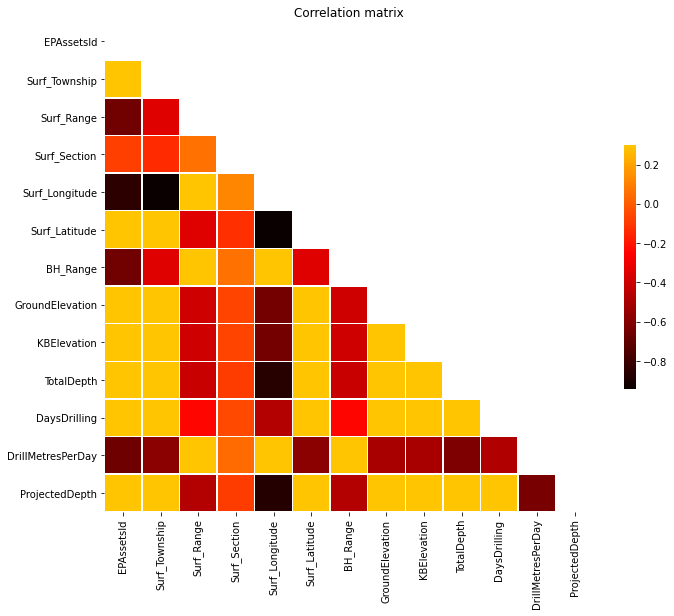

In [158]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation matrix')

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='hot', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [69]:
tvd = df['TVD']
df.drop(columns='TVD',inplace=True)

In [76]:
#Categorical Values
cat_attributes = ['CurrentStatus','WellType','Formation','Field','Pool','Surf_Meridian','Surf_QuarterUnit','Surf_Unit','Surf_Block','Surf_NTSMapSheet',
                 'Surf_Series','Surf_Area','Surf_Sheet','Surf_QuarterSection','LaheeClass','DrillingContractor','WellProfile','PSACAreaCode','PSACAreaName']

In [141]:
#Numerical Values
num_attributes=list(set(list(df.columns))-  set (cat_attributes))
df_num = df.drop(columns=cat_attributes)
df_cat = df.drop(columns=num_attributes)

In [78]:
from sklearn.impute import SimpleImputer

In [79]:
#Replace missing values for Project Depth with median
imputer = SimpleImputer(strategy='median')
imputer.fit(df[['ProjectedDepth']])
df['ProjectedDepth']=imputer.transform(df[['ProjectedDepth']])

In [105]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [147]:
#One hot encoder for categories
ohe = OneHotEncoder(sparse=False)
df_ohe = ohe.fit_transform(df_cat)
columns_names= ohe.get_feature_names(cat_attributes)
df_cat = pd.DataFrame(df_ohe,columns=columns_names)

In [148]:
df_cat.head()

,CurrentStatus_Active,CurrentStatus_Flowing,CurrentStatus_Gas Lift,CurrentStatus_Pumping,CurrentStatus_Suspended,WellType_Crude Oil,WellType_Gas,WellType_Oil Production,WellType_Shale Gas And Other Source,WellType_Shale Gas Only,...,PSACAreaCode_AB5,PSACAreaCode_AB7,PSACAreaCode_SK2,PSACAreaName_Central Alberta,PSACAreaName_East Central Alberta,PSACAreaName_Foothills,PSACAreaName_Foothills Front,PSACAreaName_Northwestern Alberta,PSACAreaName_Southeastern Alberta,PSACAreaName_Southwestern Saskatchewan
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [135]:
#Numerical pipeline, change normalize numerical values
num_pipline = Pipeline([
    ('immputer', SimpleImputer(strategy='median')),
    ('std_scales',StandardScaler())
])

In [149]:
# pipeline for numberical 
df_num1 =num_pipline.fit_transform(df_num)

In [150]:
#Join numerical and categorical dataframe
num = pd.DataFrame(df_num1,columns=df_num.columns)
num.head()

,EPAssetsId,Surf_Township,Surf_Range,Surf_Section,Surf_Longitude,Surf_Latitude,BH_Range,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,ProjectedDepth
0,0.905529,1.461555,1.101729,0.690251,-1.209427,1.476994,1.100705,-0.149104,-0.151524,0.351672,-0.065173,-0.807486,0.613955
1,0.886241,1.461555,1.101729,0.215376,-1.217531,1.472307,1.100705,-0.235332,-0.234411,0.288238,-0.065173,-0.822979,0.663410
2,0.903415,1.461555,1.101729,0.215376,-1.217585,1.472192,1.100705,-0.229486,-0.231503,0.281593,-0.098614,-0.781679,0.515045
3,0.897201,1.461555,1.101729,0.215376,-1.217867,1.466949,1.100705,-0.165911,-0.174063,0.334152,-0.132054,-0.715818,0.663410
4,0.916208,1.523589,1.101729,-1.114272,-1.237129,1.512330,1.100705,-0.498401,-0.484527,0.383087,-0.265818,-0.337256,0.608021


In [151]:
pd_clean = pd.concat([num,df_cat],axis=1)
pd_clean.head()

,EPAssetsId,Surf_Township,Surf_Range,Surf_Section,Surf_Longitude,Surf_Latitude,BH_Range,GroundElevation,KBElevation,TotalDepth,...,PSACAreaCode_AB5,PSACAreaCode_AB7,PSACAreaCode_SK2,PSACAreaName_Central Alberta,PSACAreaName_East Central Alberta,PSACAreaName_Foothills,PSACAreaName_Foothills Front,PSACAreaName_Northwestern Alberta,PSACAreaName_Southeastern Alberta,PSACAreaName_Southwestern Saskatchewan
0,0.905529,1.461555,1.101729,0.690251,-1.209427,1.476994,1.100705,-0.149104,-0.151524,0.351672,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.886241,1.461555,1.101729,0.215376,-1.217531,1.472307,1.100705,-0.235332,-0.234411,0.288238,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.903415,1.461555,1.101729,0.215376,-1.217585,1.472192,1.100705,-0.229486,-0.231503,0.281593,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.897201,1.461555,1.101729,0.215376,-1.217867,1.466949,1.100705,-0.165911,-0.174063,0.334152,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.916208,1.523589,1.101729,-1.114272,-1.237129,1.512330,1.100705,-0.498401,-0.484527,0.383087,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [146]:
pd_clean.shape

(6731, 32)

In [159]:
pd_clean.to_csv('well_header_clean.csv')